In [ ]:
file_url <- "https://raw.githubusercontent.com/Gudguykartik/Rproj/main/data.csv"
download.file(file_url, "Rdata.csv")

df = read.csv("Rdata.csv")

print(head(df))

  ID Age Experience Income ZIP.Code Family CCAvg Education Mortgage
1  1  25          1     49    91107      4   1.6         1        0
2  2  45         19     34    90089      3   1.5         1        0
3  3  39         15     11    94720      1   1.0         1        0
4  4  35          9    100    94112      1   2.7         2        0
5  5  35          8     45    91330      4   1.0         2        0
6  6  37         13     29    92121      4   0.4         2      155
  Personal.Loan Securities.Account CD.Account Online CreditCard
1             0                  1          0      0          0
2             0                  1          0      0          0
3             0                  0          0      0          0
4             0                  0          0      0          0
5             0                  0          0      0          1
6             0                  0          0      1          0


In [ ]:
df <- subset(df, select = -c(ID, 5))

print(head(df))

  Age Experience Income Family CCAvg Education Mortgage Personal.Loan
1  25          1     49      4   1.6         1        0             0
2  45         19     34      3   1.5         1        0             0
3  39         15     11      1   1.0         1        0             0
4  35          9    100      1   2.7         2        0             0
5  35          8     45      4   1.0         2        0             0
6  37         13     29      4   0.4         2      155             0
  Securities.Account CD.Account Online CreditCard
1                  1          0      0          0
2                  1          0      0          0
3                  0          0      0          0
4                  0          0      0          0
5                  0          0      0          1
6                  0          0      1          0


In [ ]:
summary(df)


      Age          Experience       Income           Family     
 Min.   :23.00   Min.   :-3.0   Min.   :  8.00   Min.   :1.000  
 1st Qu.:35.00   1st Qu.:10.0   1st Qu.: 39.00   1st Qu.:1.000  
 Median :45.00   Median :20.0   Median : 64.00   Median :2.000  
 Mean   :45.34   Mean   :20.1   Mean   : 73.77   Mean   :2.396  
 3rd Qu.:55.00   3rd Qu.:30.0   3rd Qu.: 98.00   3rd Qu.:3.000  
 Max.   :67.00   Max.   :43.0   Max.   :224.00   Max.   :4.000  
     CCAvg          Education        Mortgage     Personal.Loan  
 Min.   : 0.000   Min.   :1.000   Min.   :  0.0   Min.   :0.000  
 1st Qu.: 0.700   1st Qu.:1.000   1st Qu.:  0.0   1st Qu.:0.000  
 Median : 1.500   Median :2.000   Median :  0.0   Median :0.000  
 Mean   : 1.938   Mean   :1.881   Mean   : 56.5   Mean   :0.096  
 3rd Qu.: 2.500   3rd Qu.:3.000   3rd Qu.:101.0   3rd Qu.:0.000  
 Max.   :10.000   Max.   :3.000   Max.   :635.0   Max.   :1.000  
 Securities.Account   CD.Account         Online         CreditCard   
 Min.   :0.00

In [ ]:
experience_negative <- df$Experience[df$Experience < 0]
table(experience_negative)

experience_negative
-3 -2 -1 
 4 15 33 

In [ ]:
df$Experience <- abs(df$Experience)

In [ ]:
# Use colSums() and is.na() to count missing values in each column
missing_values <- colSums(is.na(df))

# Print the missing values count for each column
print(missing_values)

               Age         Experience             Income             Family 
                 0                  0                  0                  0 
             CCAvg          Education           Mortgage      Personal.Loan 
                 0                  0                  0                  0 
Securities.Account         CD.Account             Online         CreditCard 
                 0                  0                  0                  0 


In [ ]:
install.packages('e1071')

# **UNIVARIATE ANALYSIS**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




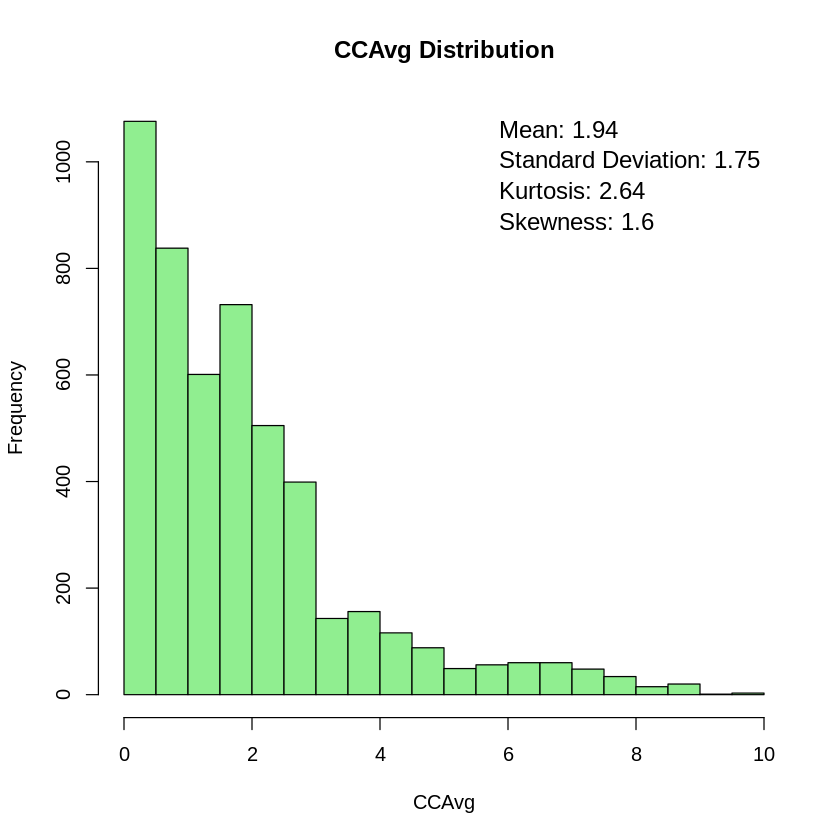

In [ ]:
library(e1071)

ccavg <- df$CCAvg
# Calculate mean, median, and standard deviation
mean_val <- mean(ccavg)
sd_val <- sd(ccavg)
kurt_val = kurtosis(ccavg)
# Calculate skewness
skewness_val <- skewness(ccavg)

hist(ccavg, breaks = 20, main = "CCAvg Distribution", xlab = "CCAvg", col = "lightgreen")

legend(x = "topright",
       legend = c(paste("Mean:", round(mean_val, 2)),
                  paste("Standard Deviation:", round(sd_val, 2)),
                  paste("Kurtosis:", round(kurt_val, 2)),
                  paste("Skewness:", round(skewness_val, 2))),
       bty = "n", col = "black", cex = 1.2)

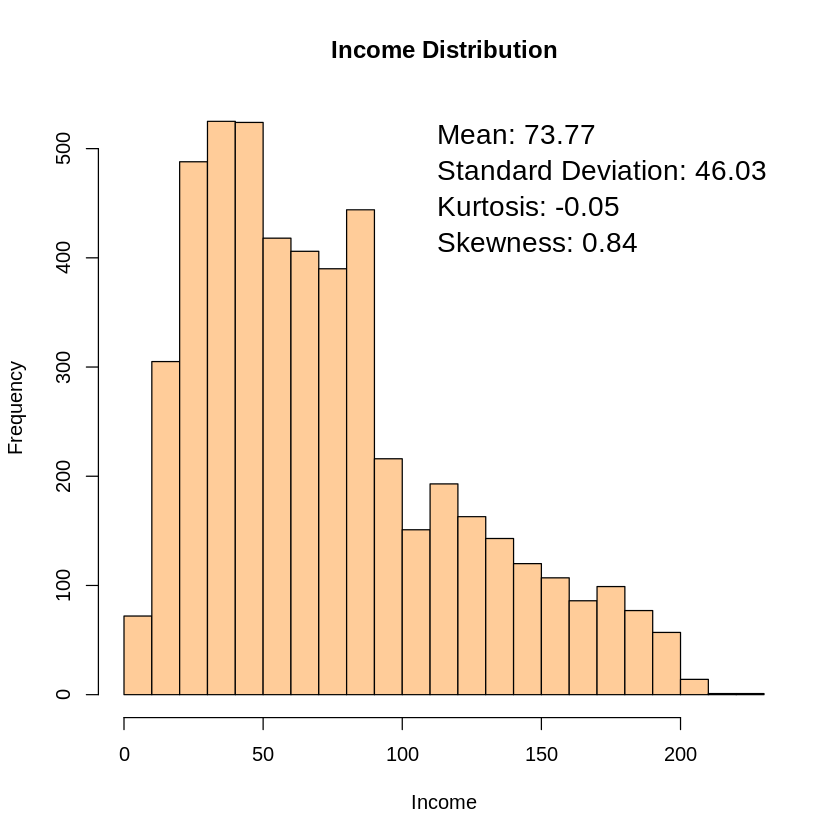

In [ ]:
income <- df$Income
hist(income, breaks = 20, main = "Income Distribution", xlab = "Income",col = "#FFCC99")
# Calculate mean, median, and standard deviation
mean_val <- mean(income)
kurt_val = kurtosis(income)
sd_val <- sd(income)
skewness_val = skewness(income)
legend(x = "topright",
       legend = c(paste("Mean:", round(mean_val, 2)),
                  paste("Standard Deviation:", round(sd_val, 2)),
                  paste("Kurtosis:", round(kurt_val, 2)),
                  paste("Skewness:", round(skewness_val, 2))),
       bty = "n", col = "black", cex = 1.4)

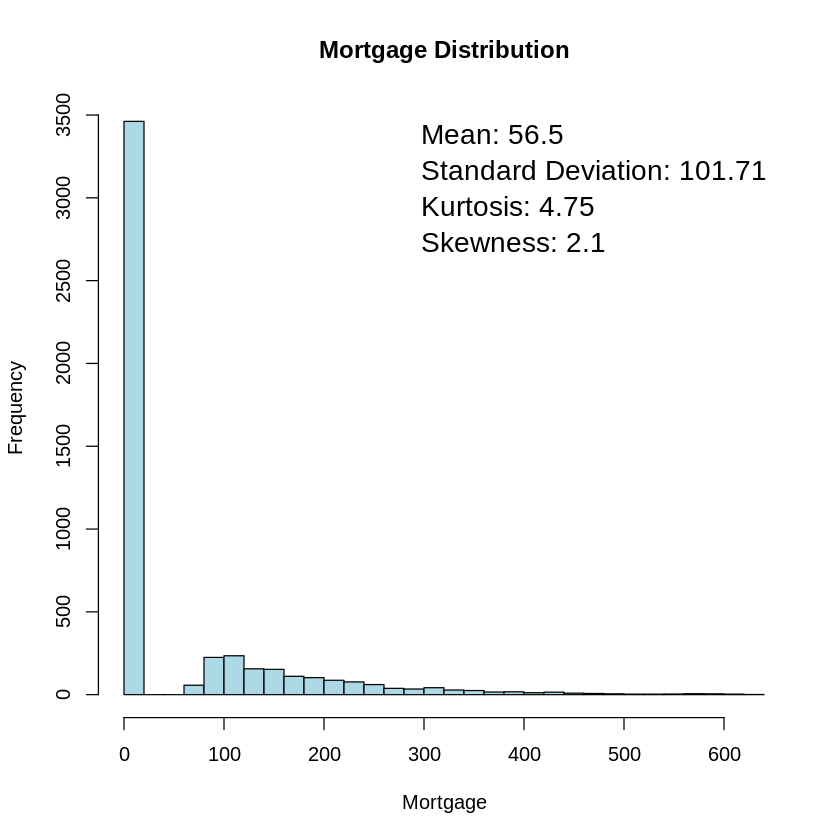

In [ ]:
mortgage <- df$Mortgage
hist(mortgage, breaks = 30, main = "Mortgage Distribution", xlab = "Mortgage", col = "lightblue")

# Calculate mean, median, and standard deviation
mean_val <- mean(mortgage)
sd_val <- sd(mortgage)
kurt_val = kurtosis(mortgage)
skewness_val = skewness(mortgage)
# Create legend with mean, median, and standard deviation
legend(x = "topright",
       legend = c(paste("Mean:", round(mean_val, 2)),
                  paste("Standard Deviation:", round(sd_val, 2)),
                  paste("Kurtosis:", round(kurt_val, 2)),
                  paste("Skewness:", round(skewness_val, 2))),
       bty = "n", col = "black", cex = 1.4)

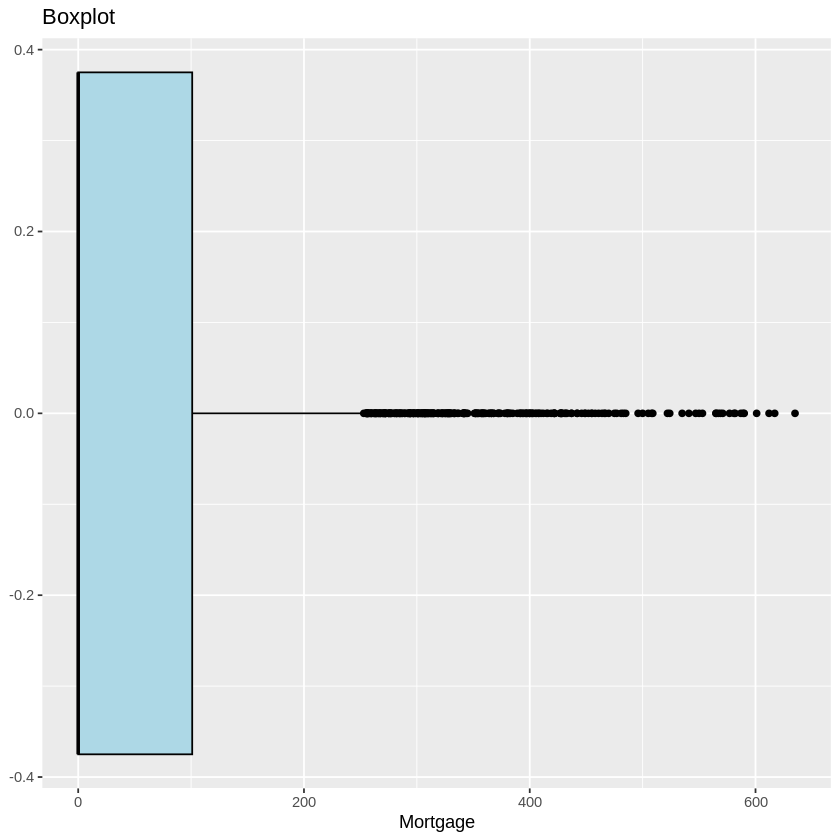

In [ ]:
library(ggplot2)

ggplot(df, aes(x = Mortgage)) +
      geom_boxplot(fill = "lightblue", color = "black") +
      labs(title = "Boxplot", x = "Mortgage")

In [ ]:
# Calculate the Z-score for the Mortgage column
z_scores <- (df$Mortgage - mean(df$Mortgage)) / sd(df$Mortgage)

# Define a threshold (e.g., 3 standard deviations) for outlier detection
threshold <- 3

# Identify rows with Mortgage values greater than the threshold
outlier_rows <- which(abs(z_scores) > threshold)

# Remove the rows with outliers
df <- df[-outlier_rows, ]

# Count the number of rows removed
num_removed <- length(outlier_rows)
print(num_removed)

[1] 105



   1    2    3 
2031 1384 1480 


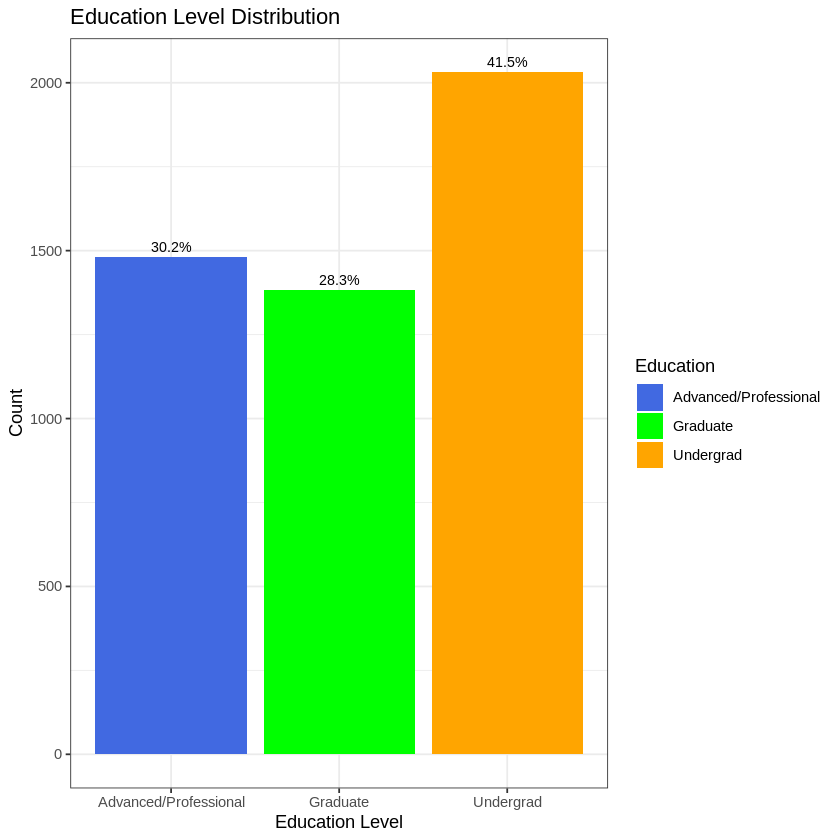

In [ ]:
library(ggplot2)

# Count the frequency of each education level
education_counts <- table(df$Education)
print(education_counts)
# Convert education levels to meaningful labels
education_labels <- c("Undergrad", "Graduate", "Advanced/Professional")

# Create a data frame for the bar graph
education_data <- data.frame(Education = education_labels, Count = as.numeric(education_counts))

# Calculate the percentage of each education level
education_data$Percentage <- education_data$Count / sum(education_data$Count) * 100

# Create the bar graph
bar_graph <- ggplot(education_data, aes(x = Education, y = Count, fill = Education)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), vjust = -0.5, size = 3) +
  labs(title = "Education Level Distribution", x = "Education Level", y = "Count") +
  theme_bw() +
  scale_fill_manual(values = c("royalblue", "green", "orange"))

# Display the bar graph
print(bar_graph)


   1    2    3    4 
1440 1255  994 1206 


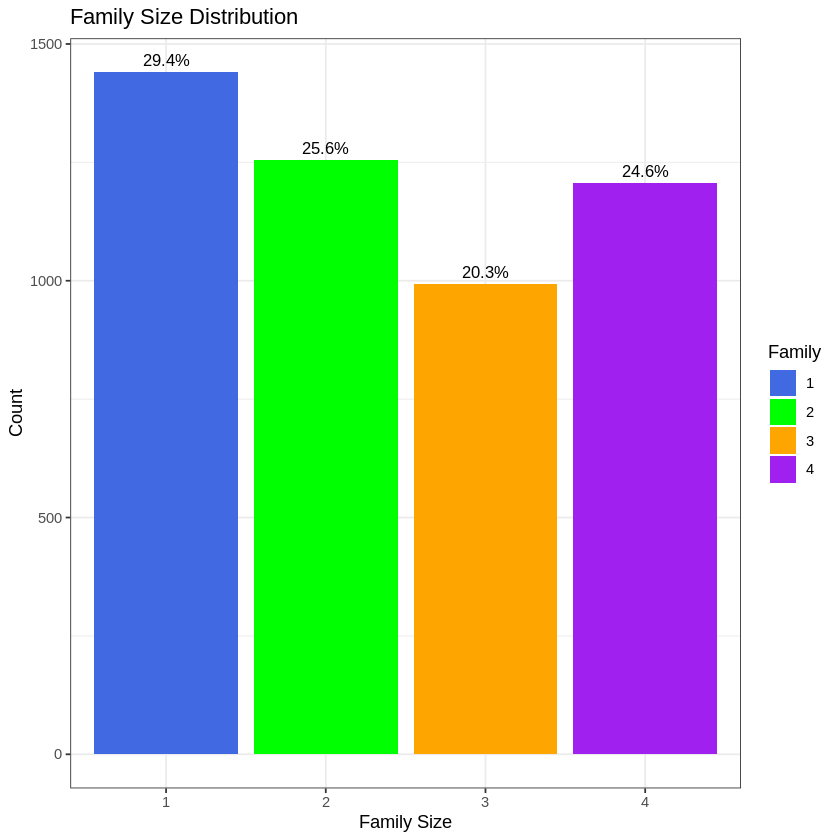

In [ ]:
library(ggplot2)

# Count the frequency of each family size
family_counts <- table(df$Family)
print(family_counts)
# Convert family sizes to meaningful labels
family_labels <- c("1", "2", "3", "4")

# Create a data frame for the bar graph
family_data <- data.frame(Family = family_labels, Count = as.numeric(family_counts))

# Calculate the percentage of each family size
family_data$Percentage <- family_data$Count / sum(family_data$Count) * 100

# Create the bar graph
bar_graph <- ggplot(family_data, aes(x = Family, y = Count, fill = Family)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), vjust = -0.5, size = 3.5) +
  labs(title = "Family Size Distribution", x = "Family Size", y = "Count") +
  theme_bw() +
  scale_fill_manual(values = c("royalblue", "green", "orange", "purple"))

# Display the bar graph
print(bar_graph)

In [ ]:
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("reshape2"):
“installation of package ‘reshape2’ had non-zero exit status”


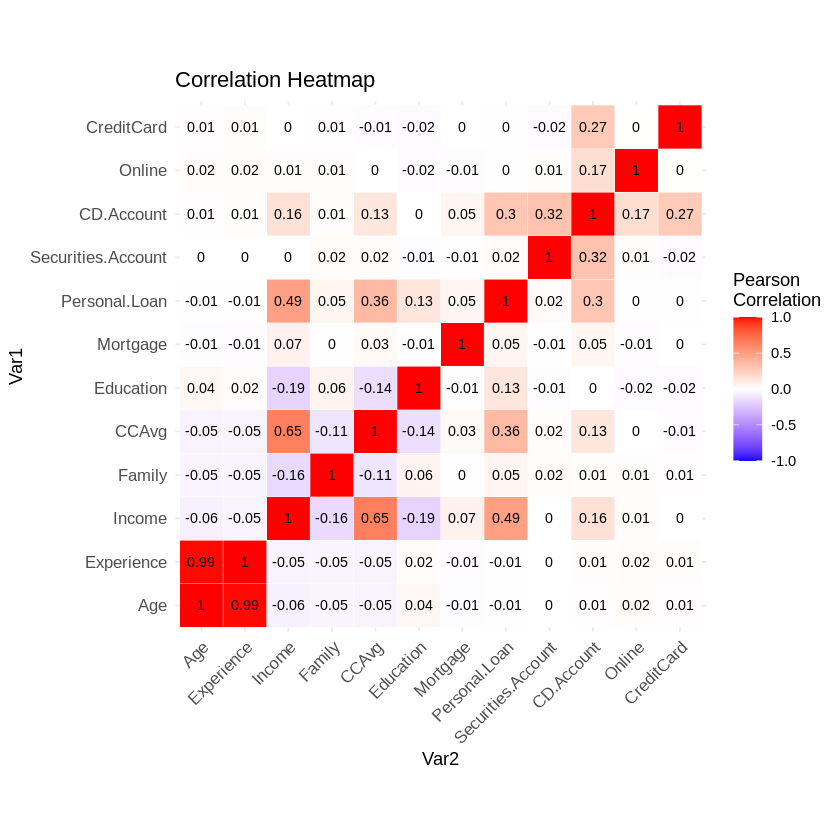

In [ ]:
library(ggplot2)
library(reshape2)

# Calculate the correlation matrix
correlation <- cor(df)


# Reshape the correlation matrix
melted_corr <- melt(correlation)


# Create the correlation heatmap
ggheatmap <- ggplot(melted_corr, aes(Var2, Var1, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 3) +  # Add correlation values
  scale_fill_gradient2(low = "blue", high = "red", mid = "grey100",
                       midpoint = 0, limits = c(-1, 1), space = "Lab",
                       name = "Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1),
        axis.text.y = element_text(size = 10)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap")

# Display the correlation heatmap
print(ggheatmap)

In [ ]:
df$CCAvg <- df$CCAvg * 12


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




   
       0    1
  1 1340  100
  2 1161   94
  3  874  120
  4 1087  119


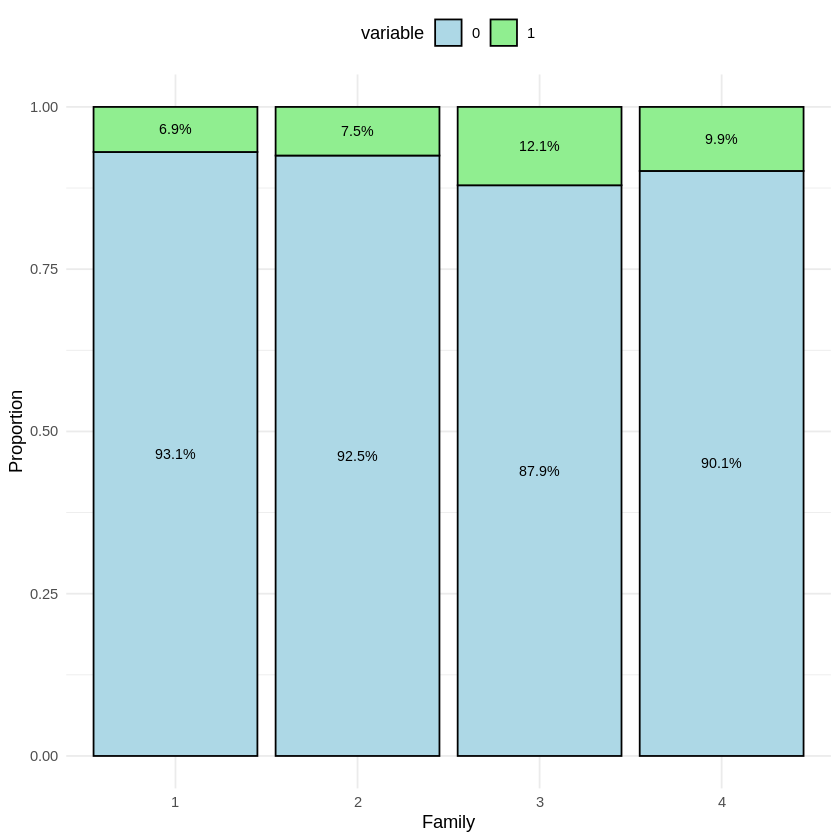

In [ ]:
# Load the required library
library(dplyr)

# Create the cross-tabulation
cross_tab <- table(df$Family, df$Personal.Loan)
print(cross_tab)

# Create the cross-tabulation with proportions
cross_tab_prop <- prop.table(cross_tab, margin = 1)

library(ggplot2)

# Convert cross_tab_prop to a data frame for plotting
cross_tab_prop_df <- as.data.frame.matrix(cross_tab_prop)
cross_tab_prop_df$Family <- rownames(cross_tab_prop_df)

# Reshape the data into long format
library(reshape2)
cross_tab_prop_df_long <- melt(cross_tab_prop_df, id.vars = "Family")

# Create the stacked bar plot with custom colors
ggplot(cross_tab_prop_df_long, aes(x = Family, y = value, fill = variable)) +
  geom_bar(stat = "identity",position = position_stack(reverse = TRUE), color = "black") +
  scale_fill_manual(values = c("lightblue", "lightgreen")) +
  labs(x = "Family", y = "Proportion") +
  theme_minimal() +
  theme(legend.position = "top") +
  guides(fill = guide_legend(ncol = 2)) +
  geom_text(aes(label = paste0(round(value * 100, 1), "%")),
            position = position_stack(reverse = TRUE , vjust = 0.5),
            size = 3)


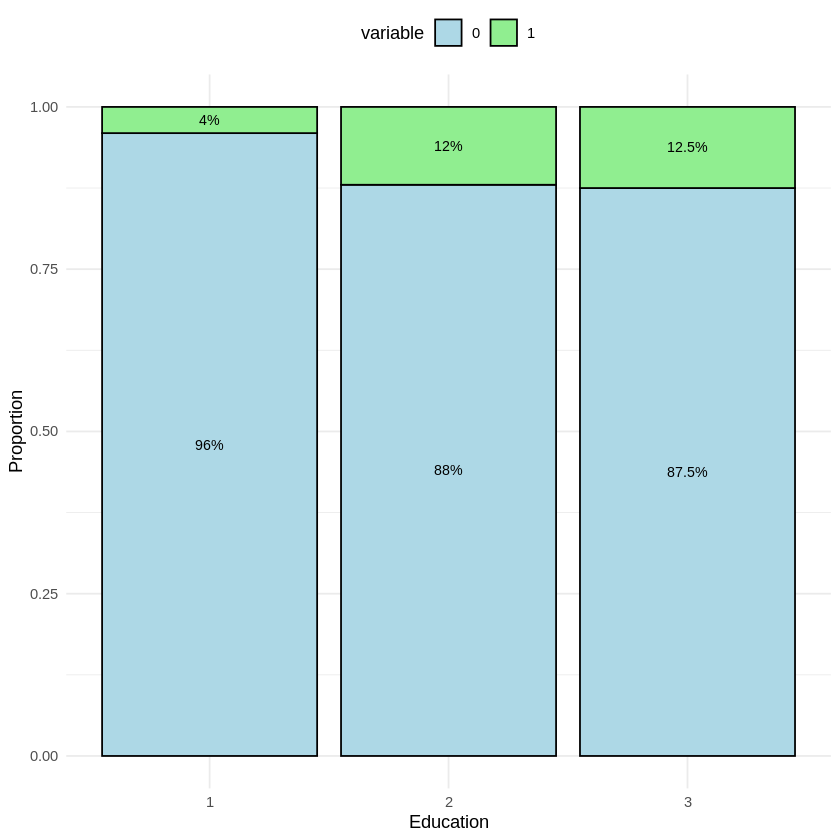

In [ ]:
# Create the cross-tabulation
cross_tab <- table(df$Education, df$Personal.Loan)

# Create the cross-tabulation with proportions
cross_tab_prop <- prop.table(cross_tab, margin = 1)

# Load the required library
library(ggplot2)

# Convert cross_tab_prop to a data frame for plotting
cross_tab_prop_df <- as.data.frame.matrix(cross_tab_prop)
cross_tab_prop_df$Education <- rownames(cross_tab_prop_df)

# Reshape the data into long format
library(reshape2)
cross_tab_prop_df_long <- melt(cross_tab_prop_df, id.vars = "Education")

# Create the stacked bar plot with custom colors
ggplot(cross_tab_prop_df_long, aes(x = Education, y = value, fill = variable)) +
  geom_bar(stat = "identity",position = position_stack(reverse = TRUE), color = "black") +
  scale_fill_manual(values = c("lightblue", "lightgreen")) +
  labs(x = "Education", y = "Proportion") +
  theme_minimal() +
  theme(legend.position = "top") +
  guides(fill = guide_legend(ncol = 2)) +
  geom_text(aes(label = paste0(round(value * 100, 1), "%")),
            position = position_stack(reverse = TRUE , vjust = 0.5),
            size = 3)

In [ ]:
# Specify the categorical variables
categorical_variables <- c('Family', 'Education','Securities.Account', 'CD.Account', 'Online', 'CreditCard')
selected_features <- character()
# Iterate over each categorical variable
for (variable in categorical_variables) {
  # Create a contingency table between the categorical variable and the target variable
  cross_tab <- table(df$Personal.Loan, df[[variable]])

  # Perform chi-squared test
  chi_squared <- chisq.test(cross_tab)

  # Extract the test statistics
  chi2_stat <- chi_squared$statistic
  p <- chi_squared$p.value

  # Print the test results
  cat(paste(variable,"\n"))
  cat(paste("chi2 statistic:", format(chi2_stat, scientific = FALSE, digits = 5), "\n"))
  cat(paste("p-value:", format(p, scientific = FALSE, digits = 5), "\n"))

  cat("\n")

   # Select features with p-values less than 0.05
  if (p < 0.05) {
    selected_features <- c(selected_features, variable)
  }
}
print(selected_features)

Family 
chi2 statistic: 23.712 
p-value: 0.000028686 

Education 
chi2 statistic: 99.76 
p-value: 0.00000000000000000000021745 

Securities.Account 
chi2 statistic: 1.866 
p-value: 0.17193 

CD.Account 
chi2 statistic: 426.1 
p-value: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011458 

Online 
chi2 statistic: 0.051124 
p-value: 0.82112 

CreditCard 
chi2 statistic: 0.015959 
p-value: 0.89947 

[1] "Family"     "Education"  "CD.Account"


In [ ]:
# Extract the target variable vector
personal_loan <- df$Personal.Loan

# Iterate over numerical variable column names
for (var in names(df)[!names(df) %in% "Personal.Loan"]) {
  correlation <- cor(personal_loan, df[[var]])
  cat("Correlation between Personal.Loan and", var, ":", correlation, "\n")
}

Correlation between Personal.Loan and Age : -0.01025186 
Correlation between Personal.Loan and Experience : -0.01047326 
Correlation between Personal.Loan and Income : 0.4924428 
Correlation between Personal.Loan and Family : 0.05262911 
Correlation between Personal.Loan and CCAvg : 0.3585382 
Correlation between Personal.Loan and Education : 0.1300538 
Correlation between Personal.Loan and Mortgage : 0.04710317 
Correlation between Personal.Loan and Securities.Account : 0.02070094 
Correlation between Personal.Loan and CD.Account : 0.2965838 
Correlation between Personal.Loan and Online : 0.003964973 
Correlation between Personal.Loan and CreditCard : -0.002594565 


In [ ]:
final_df <- df[, !(names(df) %in% c("Age", "Experience", "Securities.Account", "Online", "CreditCard"))]

In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)

# Select the categorical variables to be one-hot encoded
categorical_vars <- c("Education", "Family")

# Convert the categorical variables to factors
final_df[categorical_vars] <- lapply(final_df[categorical_vars], factor)

# Perform one-hot encoding
dummy_data <- dummyVars(~., data = final_df[, categorical_vars])
encoded_data <- predict(dummy_data, newdata = final_df[, categorical_vars])

# Select the numerical variables to be scaled
numerical_vars <- c("Income", "Mortgage", "CCAvg")

# Create a new dataframe for scaled variables
scaled_df <- data.frame(final_df[, numerical_vars])

# Apply min-max scaling
scaled_df <- apply(scaled_df, 2, function(x) (x - min(x)) / (max(x) - min(x)))

# Set the column names of the scaled dataframe
colnames(scaled_df) <- numerical_vars

# Combine scaled_df and encoded_df
combined_df <- cbind(scaled_df, encoded_data,data.frame(`Personal.Loan` = final_df$Personal.Loan, `CD.Account` = final_df$CD.Account))

df_train =  combined_df
print(head(df_train))

Loading required package: lattice



      Income  Mortgage CCAvg Education.1 Education.2 Education.3 Family.1
1 0.18981481 0.0000000  0.16           1           0           0        0
2 0.12037037 0.0000000  0.15           1           0           0        0
3 0.01388889 0.0000000  0.10           1           0           0        1
4 0.42592593 0.0000000  0.27           0           1           0        1
5 0.17129630 0.0000000  0.10           0           1           0        0
6 0.09722222 0.4293629  0.04           0           1           0        0
  Family.2 Family.3 Family.4 Personal.Loan CD.Account
1        0        0        1             0          0
2        0        1        0             0          0
3        0        0        0             0          0
4        0        0        0             0          0
5        0        0        1             0          0
6        0        0        1             0          0


In [ ]:
install.packages('caTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
library(caTools)

split <- sample.split(df_train, SplitRatio = 0.8)
split

train_reg <- subset(df_train, split == "TRUE")
test_reg <- subset(df_train, split == "FALSE")

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE

In [ ]:
install.packages('ROCR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gplots’




# **LOGISTIC REGRESSION MODEL**


Call:
glm(formula = Personal.Loan ~ ., family = "binomial", data = train_reg)

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.296644   0.363275 -20.086  < 2e-16 ***
Income      13.565125   0.766217  17.704  < 2e-16 ***
Mortgage     0.363032   0.323360   1.123   0.2616    
CCAvg        2.071684   0.531236   3.900 9.63e-05 ***
Education.1 -3.811873   0.309781 -12.305  < 2e-16 ***
Education.2 -0.005993   0.212317  -0.028   0.9775    
Education.3        NA         NA      NA       NA    
Family.1    -1.571350   0.277230  -5.668 1.44e-08 ***
Family.2    -1.741537   0.283978  -6.133 8.64e-10 ***
Family.3     0.517964   0.244057   2.122   0.0338 *  
Family.4           NA         NA      NA       NA    
CD.Account   2.298344   0.291684   7.880 3.28e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2270.15  on 3671  

   predict_reg
       0    1
  0 1119   12
  1   25   67

[1] "Accuracy = 0.969746524938675"
[1] "Precision = 0.848101265822785"
[1] "Recall = 0.728260869565217"
[1] "F1 Score = 0.783625730994152"


[1] 0.8588254

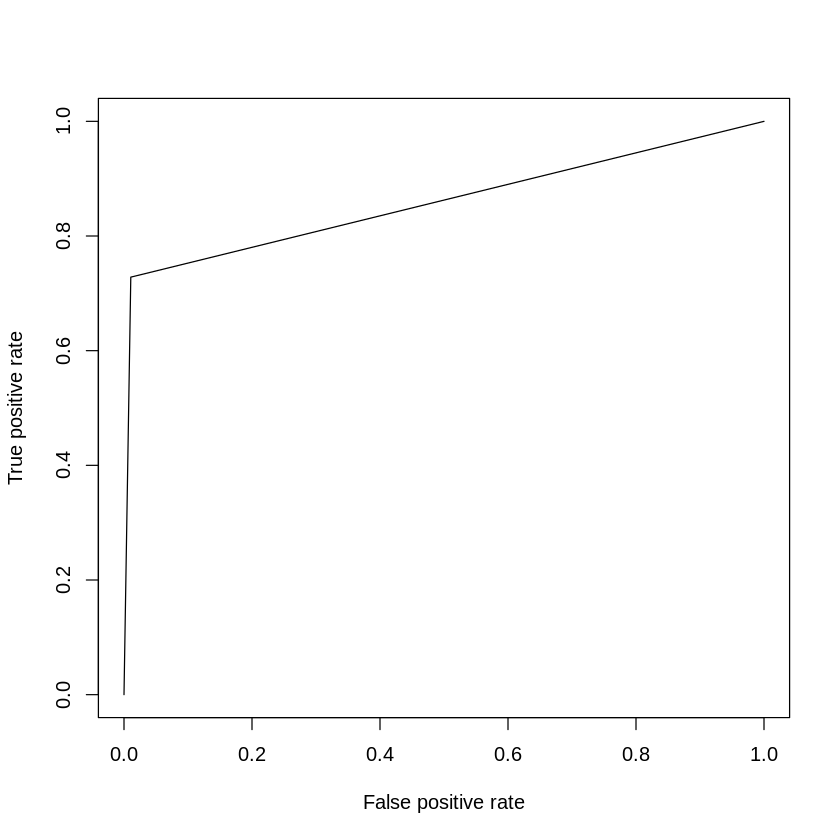

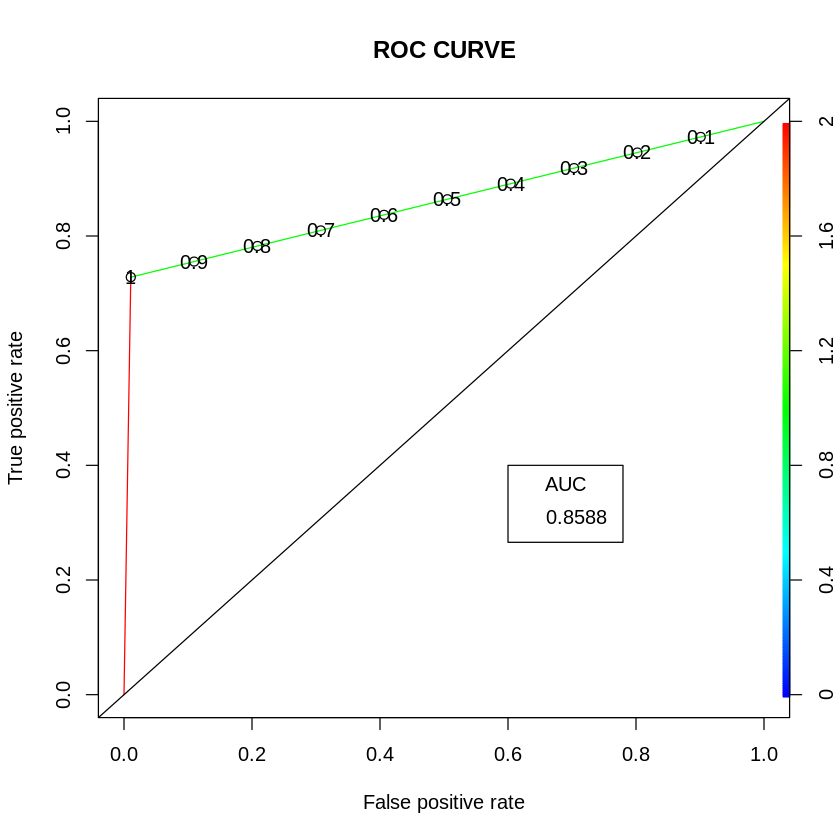

In [ ]:
library(caTools)
library(ROCR)
# Training model
logistic_model <- glm(Personal.Loan ~. ,
                      data = train_reg,
                      family = "binomial")


# Summary
summary(logistic_model)

# Predict test data based on model
predict_reg <- predict(logistic_model,
                       test_reg, type = "response")


# Changing probabilities
predict_reg <- ifelse(predict_reg >0.5, 1, 0)

# Evaluating model accuracy
# using confusion matrix
table(test_reg$Personal.Loan, predict_reg)

missing_classerr <- mean(predict_reg != test_reg$Personal.Loan)
print(paste('Accuracy =', 1 - missing_classerr))

# Calculate precision
precision <- sum(predict_reg[test_reg$Personal.Loan == 1] == 1) / sum(predict_reg == 1)
print(paste("Precision =", precision))

# Calculate recall
recall <- sum(predict_reg[test_reg$Personal.Loan == 1] == 1) / sum(test_reg$Personal.Loan == 1)
print(paste("Recall =", recall))

# Calculate F1 score
f1 <- 2 * (precision * recall) / (precision + recall)
print(paste("F1 Score =", f1))
# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$Personal.Loan)
ROCPer <- performance(ROCPred, measure = "tpr",
                      x.measure = "fpr")


auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
auc

# Plotting curve
plot(ROCPer)
plot(ROCPer, colorize = TRUE,
     print.cutoffs.at = seq(0.1, by = 0.1),
     main = "ROC CURVE")
abline(a = 0, b = 1)

auc <- round(auc, 4)
legend(.6, .4, auc, title = "AUC", cex = 1)

In [ ]:
library(e1071)
library(caTools)
library(caret)

set.seed(120)  # Setting Seed
classifier_cl <- naiveBayes(Personal.Loan ~. ,
                      data = train_reg)
classifier_cl

# Predicting on test data'
y_pred <- predict(classifier_cl, newdata = test_reg)

# Confusion Matrix
cm <- table(test_reg$Personal.Loan, y_pred)
cm

# Model Evaluation
confusionMatrix(cm)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1 
0.90713508 0.09286492 

Conditional probabilities:
   Income
Y        [,1]      [,2]
  0 0.2625991 0.1826287
  1 0.6198952 0.1432858

   Mortgage
Y        [,1]      [,2]
  0 0.1293515 0.2242162
  1 0.1742959 0.3064527

   CCAvg
Y        [,1]      [,2]
  0 0.1678337 0.1530120
  1 0.3844839 0.2059773

   Education.1
Y        [,1]      [,2]
  0 0.4250976 0.4944320
  1 0.2052786 0.4044986

   Education.2
Y        [,1]      [,2]
  0 0.2815971 0.4498455
  1 0.3870968 0.4878019

   Education.3
Y        [,1]      [,2]
  0 0.2933053 0.4553455
  1 0.4076246 0.4921148

   Family.1
Y        [,1]      [,2]
  0 0.2873011 0.4525712
  1 0.2228739 0.4167860

   Family.2
Y        [,1]      [,2]
  0 0.2623837 0.4399961
  1 0.2023460 0.4023392

   Family.3
Y        [,1]      [,2]
  0 0.1960372 0.3970566
  1 0.2932551 0.4559234

   Family.4
Y        [,

   y_pred
       0    1
  0 1050   81
  1   36   56

Confusion Matrix and Statistics

   y_pred
       0    1
  0 1050   81
  1   36   56
                                          
               Accuracy : 0.9043          
                 95% CI : (0.8865, 0.9202)
    No Information Rate : 0.888           
    P-Value [Acc > NIR] : 0.03633         
                                          
                  Kappa : 0.4385          
                                          
 Mcnemar's Test P-Value : 4.746e-05       
                                          
            Sensitivity : 0.9669          
            Specificity : 0.4088          
         Pos Pred Value : 0.9284          
         Neg Pred Value : 0.6087          
             Prevalence : 0.8880          
         Detection Rate : 0.8585          
   Detection Prevalence : 0.9248          
      Balanced Accuracy : 0.6878          
                                          
       'Positive' Class : 0               
                                          